In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
from functions import *

# SET UP SPARK

In [2]:
# import the python libraries to create/connect to a Spark Session
from pyspark.sql import SparkSession

# build a SparkSession 
#   connect to the master node on the port where the master node is listening (7077)
#   declare the app name 
#   configure the executor memory to 512 MB
#   either *connect* or *create* a new Spark Context
spark = SparkSession.builder \
    .master("spark://spark-master:7077")\
    .appName("My first spark application")\
    .config("spark.executor.memory", "512m")\
    .getOrCreate()

24/07/04 13:40:55 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
# create a spark context
sc = spark.sparkContext

# DESCRIBE THE DATA SET

In [4]:
data = fetch_kddcup99(return_X_y = True, percent10 = True) # default percent10=True

In [5]:
print("The number of samples is ", data[0].shape[0])
print("The dimensionality is ", data[0].shape[1])

The number of samples is  494021
The dimensionality is  41


Classes: 23
Samples total: 4898431
Dimensionality: 41
Features: discrete (int) or continuous (float)

The first containing a 2D array of shape (n_samples, n_features) with each row representing one sample and each column representing the features


The first 4 elements of the data set (letters, what are them)
Duration: The length (in seconds) of the connection.
Protocol Type: The type of protocol used, such as TCP, UDP, or ICMP.
Service: The network service on the destination, such as HTTP, FTP, or SMTP.
Flag: The status flag of the connection, such as SF (successful connection), REJ (connection rejected), etc.

In [6]:
# collect samples and features (target)
x = data[0]
y = data[1] 

In [7]:
# cut the data fro memory reasons
subLen = 1000
x = x[:subLen,]
y = y[:subLen]

In [8]:
# cycle over num_slices to be run on cloud veneto on a .py

In [10]:
nSlice = None # IMPORTANT PARAMETER FOR NUMBER OF PARTITIONS
Rdd = sc.parallelize([(None, {"x": x[i],"y": y[i], "d2":None}) for i in range(len(y))], numSlices = nSlice)

In [11]:
Rdd.getNumPartitions() # check partitions

16

Check the symbolic variables in the dataset to have only usefull data

In [12]:
typeElement = Rdd.map(lambda datum: datum[1]["x"])\
                 .map(lambda x: [set([type(x[i])]) for i in range(len(x))])\
                 .reduce(lambda a, b: [a[i].union(b[i]) for i in range(len(a))])

In [13]:
## ADD TABLES WITH MATPLOTLIB
print("The types of the dimensionalities are:")
typeElement

The types of the dimensionalities are:


[{int},
 {bytes},
 {bytes},
 {bytes},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {int},
 {float},
 {float},
 {float},
 {float},
 {float},
 {float},
 {float},
 {int},
 {int},
 {float},
 {float},
 {float},
 {float},
 {float},
 {float},
 {float},
 {float}]

Look for the unique variables over the attributes using parallel processing

In [14]:
%%time
uniquesParallel = []
for i in range(41):
    s = Rdd.map(lambda datum: datum[1]["x"])\
        .map(lambda x: x[i])\
        .distinct()\
        .count()
    uniquesParallel.append(s)

24/07/04 13:42:33 WARN TaskSetManager: Lost task 14.0 in stage 2.0 (TID 47) (10.67.22.136 executor 2): java.lang.reflect.InvocationTargetException
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
	at org.apache.spark.io.CompressionCodec$.createCodec(CompressionCodec.scala:88)
	at org.apache.spark.MapOutputTracker$.deserializeObject$1(MapOutputTracker.scala:1570)
	at org.apache.spark.MapOutputTracker$.deserializeOutputStatuses(MapOutputTracker.scala:1585)
	at org.apache.spark.MapOutputTrackerWorker.$anonfun$getStatuses$7(MapOutputTracker.scala:1461)
	at org.apache.spark.util.KeyLock.withLock(KeyLock.scala:64)
	at org.apache.spark.M

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 2.0 failed 4 times, most recent failure: Lost task 3.3 in stage 2.0 (TID 56) (10.67.22.136 executor 2): java.lang.reflect.InvocationTargetException
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
	at org.apache.spark.io.CompressionCodec$.createCodec(CompressionCodec.scala:88)
	at org.apache.spark.MapOutputTracker$.deserializeObject$1(MapOutputTracker.scala:1570)
	at org.apache.spark.MapOutputTracker$.deserializeOutputStatuses(MapOutputTracker.scala:1585)
	at org.apache.spark.MapOutputTrackerWorker.$anonfun$getStatuses$7(MapOutputTracker.scala:1461)
	at org.apache.spark.util.KeyLock.withLock(KeyLock.scala:64)
	at org.apache.spark.MapOutputTrackerWorker.getStatuses(MapOutputTracker.scala:1454)
	at org.apache.spark.MapOutputTrackerWorker.getMapSizesByExecutorIdImpl(MapOutputTracker.scala:1319)
	at org.apache.spark.MapOutputTrackerWorker.getMapSizesByExecutorId(MapOutputTracker.scala:1289)
	at org.apache.spark.shuffle.sort.SortShuffleManager.getReader(SortShuffleManager.scala:140)
	at org.apache.spark.shuffle.ShuffleManager.getReader(ShuffleManager.scala:63)
	at org.apache.spark.shuffle.ShuffleManager.getReader$(ShuffleManager.scala:57)
	at org.apache.spark.shuffle.sort.SortShuffleManager.getReader(SortShuffleManager.scala:73)
	at org.apache.spark.rdd.ShuffledRDD.compute(ShuffledRDD.scala:106)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.NoClassDefFoundError: Could not initialize class com.github.luben.zstd.RecyclingBufferPool
	at org.apache.spark.io.ZStdCompressionCodec.<init>(CompressionCodec.scala:228)
	... 36 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.reflect.InvocationTargetException
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at java.base/jdk.internal.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:490)
	at org.apache.spark.io.CompressionCodec$.createCodec(CompressionCodec.scala:88)
	at org.apache.spark.MapOutputTracker$.deserializeObject$1(MapOutputTracker.scala:1570)
	at org.apache.spark.MapOutputTracker$.deserializeOutputStatuses(MapOutputTracker.scala:1585)
	at org.apache.spark.MapOutputTrackerWorker.$anonfun$getStatuses$7(MapOutputTracker.scala:1461)
	at org.apache.spark.util.KeyLock.withLock(KeyLock.scala:64)
	at org.apache.spark.MapOutputTrackerWorker.getStatuses(MapOutputTracker.scala:1454)
	at org.apache.spark.MapOutputTrackerWorker.getMapSizesByExecutorIdImpl(MapOutputTracker.scala:1319)
	at org.apache.spark.MapOutputTrackerWorker.getMapSizesByExecutorId(MapOutputTracker.scala:1289)
	at org.apache.spark.shuffle.sort.SortShuffleManager.getReader(SortShuffleManager.scala:140)
	at org.apache.spark.shuffle.ShuffleManager.getReader(ShuffleManager.scala:63)
	at org.apache.spark.shuffle.ShuffleManager.getReader$(ShuffleManager.scala:57)
	at org.apache.spark.shuffle.sort.SortShuffleManager.getReader(SortShuffleManager.scala:73)
	at org.apache.spark.rdd.ShuffledRDD.compute(ShuffledRDD.scala:106)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.lang.NoClassDefFoundError: Could not initialize class com.github.luben.zstd.RecyclingBufferPool
	at org.apache.spark.io.ZStdCompressionCodec.<init>(CompressionCodec.scala:228)
	... 36 more


In [15]:
print("The number of uniques is", uniquesParallel)

The number of uniques is []


Look for the unique variables over the attributes in local

In [ ]:
%%time
uniques = []
for i in range (x.shape[1]):
    k = (len(np.unique(x[:, i])))
    uniques.append(k)
print("The uniques are:", uniques)

It takes 4 times for to do it in parallel (explain what is better to use)

why running it a second time takes way more time?

In [ ]:
%%time
kTrue = Rdd.map(lambda datum: datum[1]["y"])\
        .distinct()\
        .count()

In [ ]:
print("The true number of the classes is", kTrue)

Unique number of labels in parallel

In [ ]:
%%time
uniquesParallely = Rdd.map(lambda datum: datum[1]["y"])\
        .countByValue()

print("The y things are:", uniquesParallely)

In [ ]:
yUnique = [a.decode('utf-8') for a in uniquesParallely.keys()]
xUnique = list(uniquesParallely.values())
attributes = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"
]

Plot of the count of the ocurency of the uniques of label and attributes

In [ ]:
# add log 10 the ax and npt the count
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].barh(yUnique, np.log10(xUnique))
ax[0].set_xlabel("log10 count")
ax[0].set_ylabel("Label")
ax[0].set_title("Label count")
ax[1].barh(attributes, np.log10(uniquesParallel))
ax[1].set_xlabel("log10 count")
ax[1].set_ylabel("Attribute")
ax[1].set_title("Attribute count")
fig.tight_layout()

In [ ]:
def deleteBytes(datum):
    x = datum[1]["x"]
    mask = [type(i) != bytes for i in x]
    datum[1]["x"] = np.asarray(x[mask])
    print(x)
    print(mask)
    return datum

In [ ]:
Rdd = Rdd.map(deleteBytes)\
         .persist()

In [ ]:
numberColumns = len([i for i in typeElement if i != set([bytes])])
print("The number of columns (dimensionality) after filtering the bytes is", numberColumns)

# PARALLEL PART

In [ ]:
%%time
maxS = Rdd.map(lambda datum: datum[1]["x"])\
           .reduce(lambda a, b: np.maximum(a, b))
minS = Rdd.map(lambda datum: datum[1]["x"])\
           .reduce(lambda a, b: np.minimum(a, b))

Rdd = Rdd.map(lambda datum: minmaxRescale(datum, minS, maxS))\
         #.persist()

In [ ]:
%%time

logParallelInit = {}
logParallelKmeans = {}

k=kTrue
l=k*2 # rescaling probability to have more centroids than k

# inizialize the centroids with kmeans parallel and compute C after the iterations
C_init = parallelInit(Rdd, k, l, logParallelInit)
C = kMeans(Rdd, C_init, 15, logParallelKmeans)
Rdd=Rdd.map(lambda datum: selectCluster(datum, C))

In [ ]:
fig, ax=plt.subplots(1,3, figsize=(15,10))
ax[0].plot(logParallelInit["tCentroids"])
ax[1].plot(logParallelInit["tSamples"])
ax[2].plot(logParallelInit["CostInit"])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


NameError: name 'logParallelKmeans' is not defined

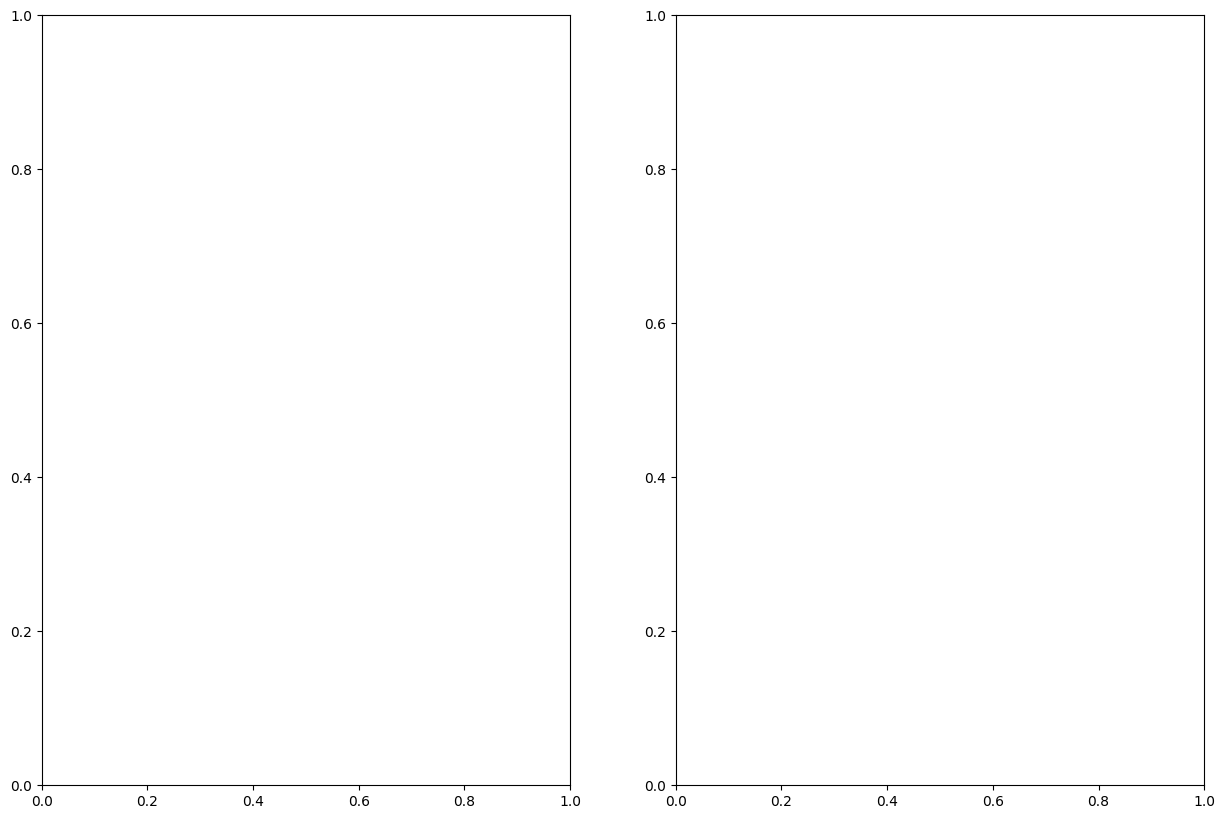

In [3]:
fig, ax=plt.subplots(1,2, figsize=(15,10))
ax[0].plot(logParallelKmeans["tIterations"])
ax[1].plot(logParallelKmeans["CostsKmeans"])